# 山河事件簿分析工具
riverlog_for_gis.py 需要在同一個目錄

文件請參閱:

https://docs.google.com/document/d/1iM_-YdZ8LFFbPkcL-4Irp9Z0laTXgUL2MzfwE4SWtFQ/edit#heading=h.lumlll4mf62a

In [186]:
from riverlog_for_gis import * 

# 多水庫庫容百分比分析
## Get/Load Data
需要的時間範圍可以在此設定

In [287]:
df_info = api_to_csv("reservoir-info",None)
filename=api_to_csv_range("2021-01-01","2021-06-06","reservoir-reservoirData",None,"ObservationTime")
dest_name="%s_GMT8.csv" %(filename[:-4])
df=csv_add_gmt8(filename,"ObservationTime", dest_name )

reservoir-info: output/reservoir-info.csv saved, shape = (152, 22)
reservoir-reservoirData: output/reservoir-reservoirData_2021-01-01.csv saved, shape = (274, 4)
reservoir-reservoirData: output/reservoir-reservoirData_2021-01-02.csv saved, shape = (296, 4)
reservoir-reservoirData: output/reservoir-reservoirData_2021-01-03.csv saved, shape = (304, 4)
reservoir-reservoirData: output/reservoir-reservoirData_2021-01-04.csv saved, shape = (310, 4)
reservoir-reservoirData: output/reservoir-reservoirData_2021-01-05.csv saved, shape = (318, 4)
reservoir-reservoirData: output/reservoir-reservoirData_2021-01-06.csv saved, shape = (321, 4)
reservoir-reservoirData: output/reservoir-reservoirData_2021-01-07.csv saved, shape = (321, 4)
reservoir-reservoirData: output/reservoir-reservoirData_2021-01-08.csv saved, shape = (322, 4)
reservoir-reservoirData: output/reservoir-reservoirData_2021-01-09.csv saved, shape = (301, 4)
reservoir-reservoirData: output/reservoir-reservoirData_2021-01-10.csv saved, 

reservoir-reservoirData: output/reservoir-reservoirData_2021-04-05.csv saved, shape = (306, 4)
reservoir-reservoirData: output/reservoir-reservoirData_2021-04-06.csv saved, shape = (322, 4)
reservoir-reservoirData: output/reservoir-reservoirData_2021-04-07.csv saved, shape = (322, 4)
reservoir-reservoirData: output/reservoir-reservoirData_2021-04-08.csv saved, shape = (322, 4)
reservoir-reservoirData: output/reservoir-reservoirData_2021-04-09.csv saved, shape = (323, 4)
reservoir-reservoirData: output/reservoir-reservoirData_2021-04-10.csv saved, shape = (305, 4)
reservoir-reservoirData: output/reservoir-reservoirData_2021-04-11.csv saved, shape = (305, 4)
reservoir-reservoirData: output/reservoir-reservoirData_2021-04-12.csv saved, shape = (323, 4)
reservoir-reservoirData: output/reservoir-reservoirData_2021-04-13.csv saved, shape = (303, 4)
reservoir-reservoirData: output/reservoir-reservoirData_2021-04-14.csv saved, shape = (323, 4)
reservoir-reservoirData: output/reservoir-reservoi

## Handle info

In [288]:
df_info=df_info[df_info['Year']==105]
df_info.drop_duplicates(subset="id")
df_info["id"] = pd.to_numeric(df_info["id"])

## Merge/Filter
需要的水庫可以在此設定

In [299]:
df2=df.merge(df_info, how='left', left_on='ReservoirIdentifier', right_on='id')
df2=df2.drop_duplicates(subset=["ObservationTime","ReservoirIdentifier"],keep='last')
df2=df2[df2['ReservoirIdentifier'].isin([10405,10201,10205])] #,20101,20201

## Calculate, Pivot

In [300]:
df2["ObservationTimeGMT8"] = pd.to_datetime(df2['ObservationTimeGMT8'])
df2['percent']=df2['EffectiveWaterStorageCapacity']/df2['EffectiveCapacity']*100
df2=df2[df2['percent']<=100]
df3 = df2.pivot(index='ObservationTimeGMT8', columns='ReservoirName', values='percent')

## Plot

<IPython.core.display.Javascript object>


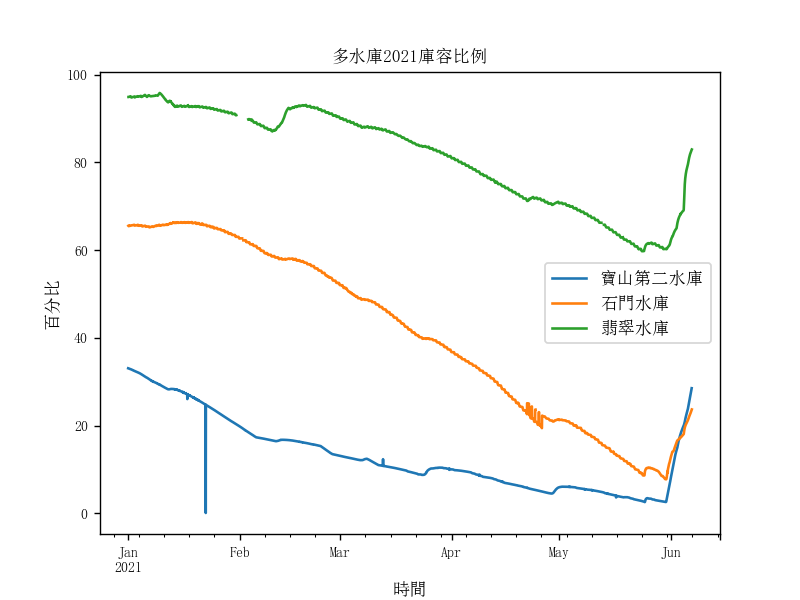

<function matplotlib.pyplot.show(block=None)>

In [301]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'/Library/Fonts/Microsoft/SimSun.ttf')
df3.plot()
plt.title("多水庫2021庫容比例",fontproperties=myfont) 
plt.legend(prop=myfont)
plt.xticks(fontname = 'SimSun',size=8)
plt.yticks(fontname = 'SimSun',size=8)
plt.xlabel('時間',fontproperties=myfont)
plt.ylabel('百分比',fontproperties=myfont)
plt.show

## DEBUG

In [295]:
#df=df.astype({'ReservoirIdentifier': object})
#df_info=df_info.astype({'id': int64})
#df3.dtypes
df2

,Unnamed: 0,ObservationTime,ReservoirIdentifier,EffectiveWaterStorageCapacity,WaterLevel,ObservationTimeGMT8,ReservoirName,Year,Application,Area,...,FullWaterLevelArea,Height,Length,Location,TheLastestMeasuredTimeOfReservoirCapacity,Type,id,lat,lng,percent
4,13,2020-12-31T16:00:00.000Z,20101,3457.87,274.44,2021-01-01 00:00:00,鯉魚潭水庫,105.0,公共給水、灌溉、觀光,臺灣中區,...,436.37,96.0,235.0,苗栗縣卓蘭鎮\n大湖鄉,105.10,滾壓式土石壩,20101.0,24.343310,120.776048,30.203194
26,16,2020-12-31T17:00:00.000Z,20101,3453.99,274.42,2021-01-01 01:00:00,鯉魚潭水庫,105.0,公共給水、灌溉、觀光,臺灣中區,...,436.37,96.0,235.0,苗栗縣卓蘭鎮\n大湖鄉,105.10,滾壓式土石壩,20101.0,24.343310,120.776048,30.169303
44,26,2020-12-31T18:00:00.000Z,20101,3453.99,274.42,2021-01-01 02:00:00,鯉魚潭水庫,105.0,公共給水、灌溉、觀光,臺灣中區,...,436.37,96.0,235.0,苗栗縣卓蘭鎮\n大湖鄉,105.10,滾壓式土石壩,20101.0,24.343310,120.776048,30.169303
48,35,2020-12-31T19:00:00.000Z,20101,3450.11,274.40,2021-01-01 03:00:00,鯉魚潭水庫,105.0,公共給水、灌溉、觀光,臺灣中區,...,436.37,96.0,235.0,苗栗縣卓蘭鎮\n大湖鄉,105.10,滾壓式土石壩,20101.0,24.343310,120.776048,30.135413
76,46,2020-12-31T20:00:00.000Z,20101,3448.17,274.39,2021-01-01 04:00:00,鯉魚潭水庫,105.0,公共給水、灌溉、觀光,臺灣中區,...,436.37,96.0,235.0,苗栗縣卓蘭鎮\n大湖鄉,105.10,滾壓式土石壩,20101.0,24.343310,120.776048,30.118468
84,53,2020-12-31T21:00:00.000Z,20101,3446.23,274.38,2021-01-01 05:00:00,鯉魚潭水庫,105.0,公共給水、灌溉、觀光,臺灣中區,...,436.37,96.0,235.0,苗栗縣卓蘭鎮\n大湖鄉,105.10,滾壓式土石壩,20101.0,24.343310,120.776048,30.101523
104,62,2020-12-31T22:00:00.000Z,20101,3444.29,274.37,2021-01-01 06:00:00,鯉魚潭水庫,105.0,公共給水、灌溉、觀光,臺灣中區,...,436.37,96.0,235.0,苗栗縣卓蘭鎮\n大湖鄉,105.10,滾壓式土石壩,20101.0,24.343310,120.776048,30.084577
115,87,2020-12-31T23:00:00.000Z,20101,3440.41,274.35,2021-01-01 07:00:00,鯉魚潭水庫,105.0,公共給水、灌溉、觀光,臺灣中區,...,436.37,96.0,235.0,苗栗縣卓蘭鎮\n大湖鄉,105.10,滾壓式土石壩,20101.0,24.343310,120.776048,30.050687
161,68,2020-12-31T23:00:00.000Z,20201,5863.20,1361.69,2021-01-01 07:00:00,德基水庫,105.0,發電,臺灣中區,...,453.10,180.0,285.0,臺中市和平區,104.12,混凝土双曲線拱壩,20201.0,24.255283,121.165311,38.874965
195,96,2021-01-01T00:00:00.000Z,20101,3440.41,274.35,2021-01-01 08:00:00,鯉魚潭水庫,105.0,公共給水、灌溉、觀光,臺灣中區,...,436.37,96.0,235.0,苗栗縣卓蘭鎮\n大湖鄉,105.10,滾壓式土石壩,20101.0,24.343310,120.776048,30.050687


In [ ]:
#df2.plot.line(x=df2["ObservationTimeGMT8"],y='WaterLevel')
#df2.ObservationTimeGMT8 = pd.to_datetime(df2.ObservationTimeGMT8).dt.time
#df2.set_index('Time').plot()
df2["ObservationTimeGMT8"] = pd.to_datetime(df2['ObservationTimeGMT8'])
df2['percent']=df2['EffectiveWaterStorageCapacity']/3147.18*100
df2.plot(x="ObservationTimeGMT8", y=["percent"])
plt.show()

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'/Library/Fonts/Microsoft/SimSun.ttf')
df2.plot(x='ObservationTimeGMT8',y='WaterLevel') #line type have problem
#plt.title("排放量按主要都市分",fontproperties=myfont) 
#plt.xlabel('縣市',fontproperties=myfont)
#plt.ylabel('公噸',fontproperties=myfont)
#plt.legend(prop=myfont)
#plt.xticks(fontname = 'SimSun',size=8)
#plt.yticks(fontname = 'SimSun',size=8)
plt.show()

# 今日淹水

可看今天有哪些測站有淹過水
需要預先準備的測站縣市資訊，在同目錄的 flood-station_縣市鄉鎮.csv，準備方式請參考文件

In [ ]:
from datetime import date
#load 測站縣市補充資料
df_info_縣市鄉鎮 = pd.read_csv("flood-station_縣市鄉鎮.csv")

#get data, process
df_info=api_to_csv("flood-station",None)
df_info=df_info.merge(df_info_縣市鄉鎮, how='left', left_on='_id', right_on='_id')
df_info

today_str = date.today() # 2021-06-07
print("Today is %s" %(today_str))
df = api_to_csv("flood-floodData",[today_str])

df["timeGMT8"] = df['time'].apply(date_to_gmt8)
df["timeGMT8"] = pd.to_datetime(df['timeGMT8'])

df=df.merge(df_info_縣市鄉鎮, how='left', left_on='stationID', right_on='_id')
df=df.drop_duplicates(subset=["time","stationName"],keep='last')   
df['stationName_city']=df['COUNTYNAME']  + '|' + df['TOWNNAME']  + '|' +  df['stationName']

#filter, sort
df=df[df['value']>5] #可改淹水高度, 有很多淹水資料時，改高一點比較不會太多
df.sort_values(by=['timeGMT8'])
 

<IPython.core.display.Javascript object>


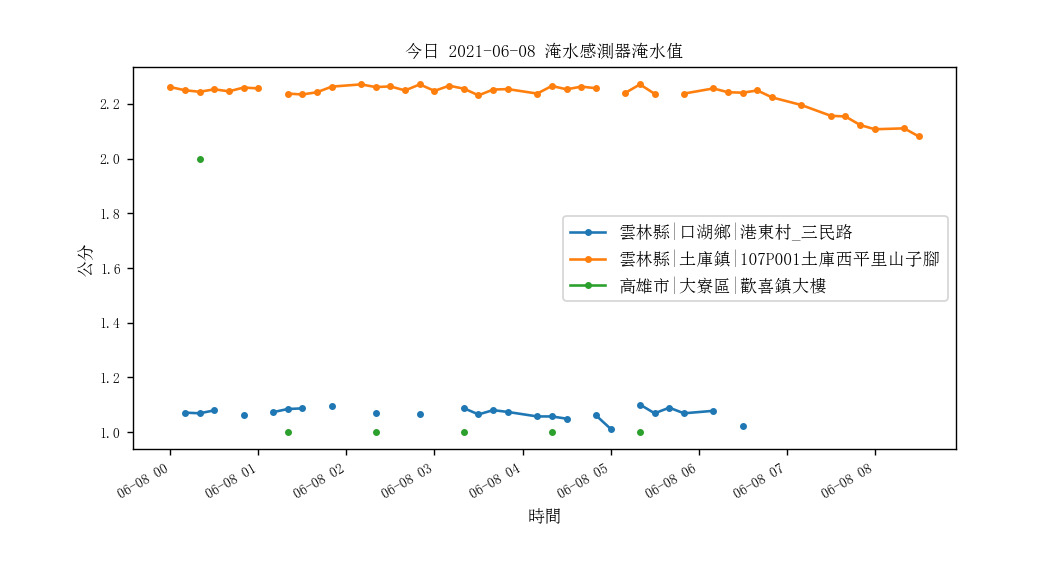

<function matplotlib.pyplot.show(block=None)>

In [339]:
%matplotlib notebook

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'/Library/Fonts/Microsoft/SimSun.ttf')
df2 = df.pivot(index='timeGMT8', columns='stationName_city', values='value')
df2.plot(style='.-')
title = "今日 %s 淹水感測器淹水值" %(date.today())
plt.title(title,fontproperties=myfont) 
plt.legend(prop=myfont)
plt.xticks(fontname = 'SimSun',size=8)
plt.yticks(fontname = 'SimSun',size=8)
plt.xlabel('時間',fontproperties=myfont)
plt.ylabel('公分',fontproperties=myfont)
fig = plt.gcf()
fig.set_size_inches(8.5, 4.5)
plt.show

## 淹水測站列表

目前條件下的測站列表

In [327]:
ary = df['stationName_city'].unique()
for name in ary:
    print(name)

雲林縣|107P001土庫西平里山子腳
雲林縣|港東村_三民路
高雄市|歡喜鎮大樓


## Debug

In [ ]:
df_info